In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import os




In [2]:
import os

path = os.listdir(r'C:\Users\kmmur\MYworkspace\Murali notes\AI training\ML projects\ML3project\Brain_Tumor_Detection_Classification-maindataset\Training')
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

In [3]:
X = []
Y = []
for cls in classes:
    pth = r'C:\Users\kmmur\MYworkspace\Murali notes\AI training\ML projects\ML3project\Brain_Tumor_Detection_Classification-maindataset\Training' + '\\' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '\\' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
import sys
print(sys.executable)


C:\Users\kmmur\.conda\envs\new_environment_name\python.exe


In [5]:
np.unique(Y)


array([0, 1])

In [6]:
X = np.array(X)
Y = np.array(Y)

In [7]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [8]:
X.shape

(1222, 200, 200)

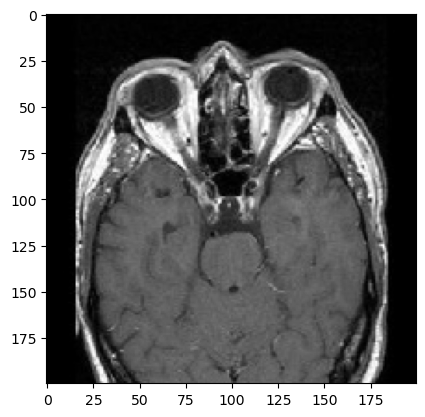

In [9]:
plt.imshow(X[0], cmap = 'gray')
plt.show()

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state = 10, test_size = 0.20)

In [12]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
#pca_train = pca.fit_transform(xtrain)
#pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [18]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [19]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [20]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [21]:
pred = sv.predict(pca_test)
np.where(ytest != pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [22]:
pred[6]

0

In [23]:
ytest[6]

0

In [24]:
dec = {0: 'No Tumor', 1: 'Positive Tumor'}

In [34]:
img = cv2.imread(r'C:\Users\kmmur\MYworkspace\Murali notes\AI training\ML projects\ML3project\Brain_Tumor_Detection_Classification-maindataset\Testing\no_tumor' + i, 0)
if img is None:
    print(f"Error loading image: {i}")
else:
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)


Error loading image: image(1).jpg


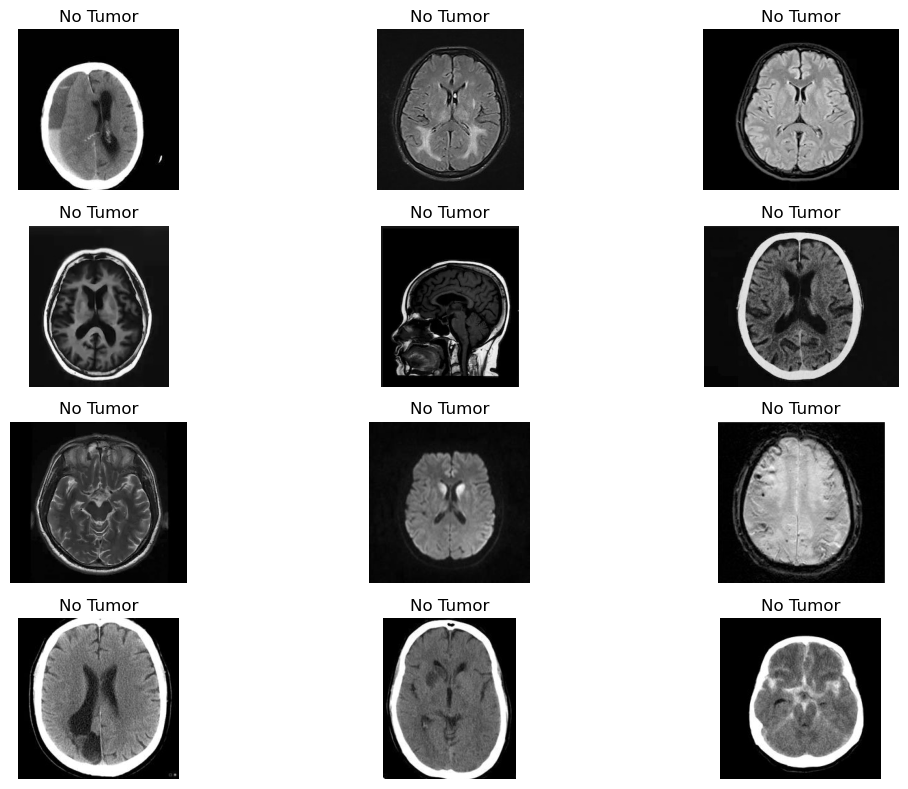

In [27]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the path to the directory containing image files
image_directory = r'C:\Users\kmmur\MYworkspace\Murali notes\AI training\ML projects\ML3project\Brain_Tumor_Detection_Classification-maindataset\Testing\no_tumor'

# Get a list of image filenames in the directory
image_filenames = os.listdir(image_directory)

# Create a 4x3 grid for subplots
plt.figure(figsize=(12, 8))
c = 1

# Filter files with the name "image" and process them
for i in image_filenames:
    if "image" in i:
        plt.subplot(4, 3, c)  # Use a 4x3 grid (12 subplots)
        # Construct the full path to the image file
        image_path = os.path.join(image_directory, i)
        
        # Check if the image file exists
        if os.path.exists(image_path):
            img = cv2.imread(image_path, 0)
            
            # Check if the image was read successfully
            if img is not None:
                img1 = cv2.resize(img, (200, 200))
                img1 = img1.reshape(1, -1) / 255
                p = sv.predict(img1)
                plt.title(dec[p[0]])
                plt.imshow(img, cmap='gray')
                plt.axis('off')
            else:
                print(f"Error reading image: {image_path}")
        else:
            print(f"Image file not found: {image_path}")
        
        c += 1
        
        # Break the loop after processing 12 images
        if c > 12:
            break

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()



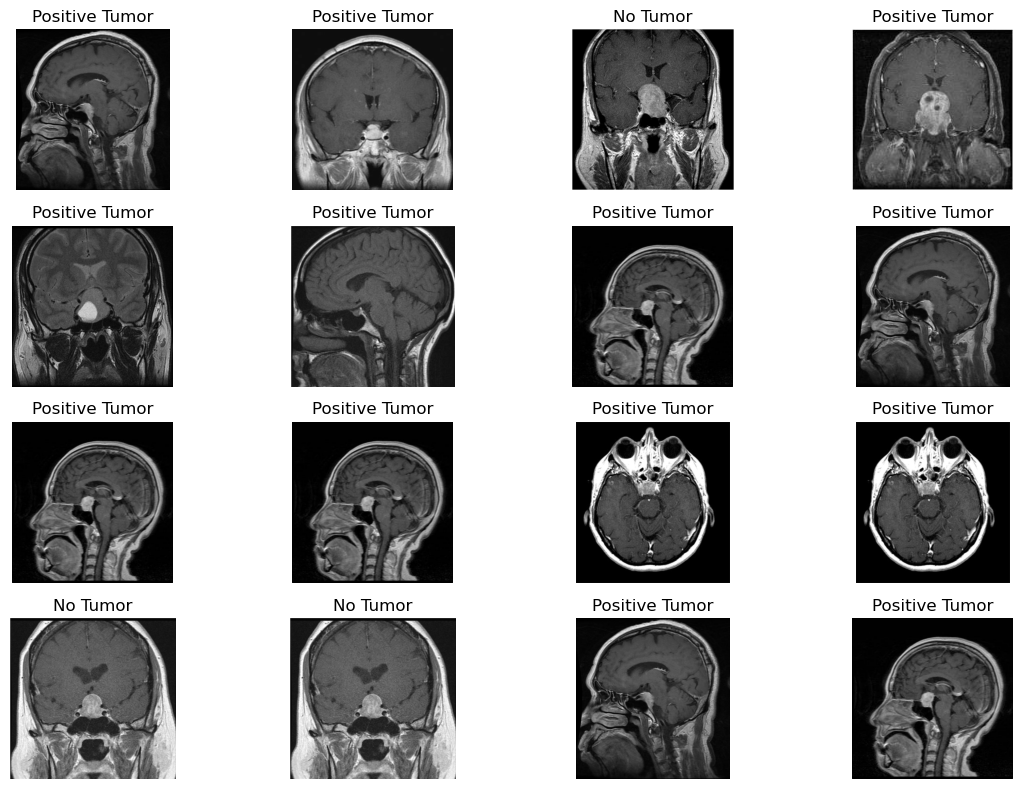

In [28]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the path to the directory containing image files
image_directory = r'C:\Users\kmmur\MYworkspace\Murali notes\AI training\ML projects\ML3project\Brain_Tumor_Detection_Classification-maindataset\Testing\pituitary_tumor'

# Get a list of image filenames in the directory
image_filenames = os.listdir(image_directory)

# Create a 4x4 grid for subplots
plt.figure(figsize=(12, 8))
c = 1

# Loop through the first 16 images (or fewer if there are fewer than 16 images)
for i in image_filenames[:16]:
    plt.subplot(4, 4, c)
    
    # Construct the full path to the image file
    image_path = os.path.join(image_directory, i)
    
    # Check if the image file exists
    if os.path.exists(image_path):
        img = cv2.imread(image_path, 0)
        
        # Check if the image was read successfully
        if img is not None:
            img1 = cv2.resize(img, (200, 200))
            img1 = img1.reshape(1, -1) / 255
            p = sv.predict(img1)
            plt.title(dec[p[0]])
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            c += 1
        else:
            print(f"Error reading image: {image_path}")
    else:
        print(f"Image file not found: {image_path}")

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()
